In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/disaster_tweet/
!ls
#


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/disaster_tweet
sample_submission.csv  test.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.duplicated().sum()

0

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<ipython-input-204-358f28d093b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='target', palette='viridis')


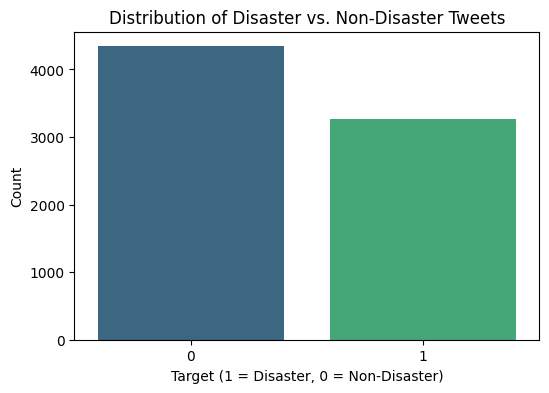

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='target', palette='viridis')
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Target (1 = Disaster, 0 = Non-Disaster)')
plt.ylabel('Count')
plt.show()


<ipython-input-205-b859178f38ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_keywords.values, y=disaster_keywords.index, palette='magma')


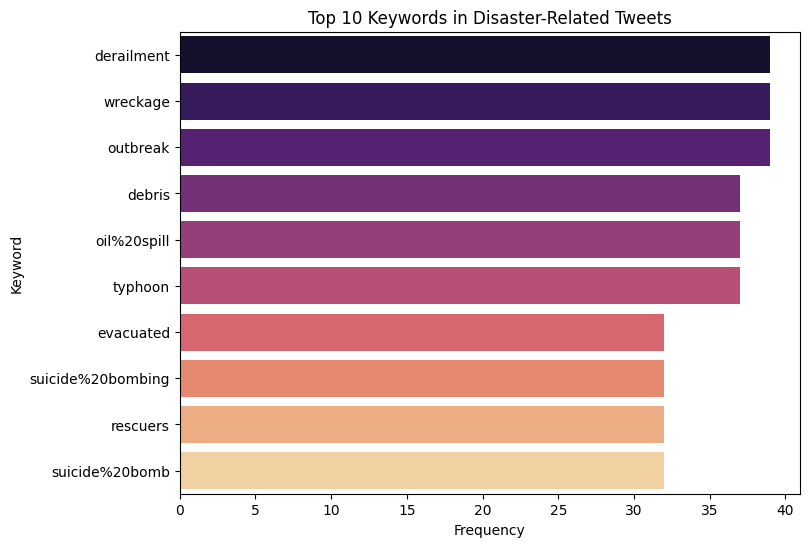

In [ ]:
# Extract top 10 keywords in disaster-related tweets
disaster_keywords = train[train['target'] == 1]['keyword'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=disaster_keywords.values, y=disaster_keywords.index, palette='magma')
plt.title('Top 10 Keywords in Disaster-Related Tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()


<ipython-input-206-5d73611abba2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


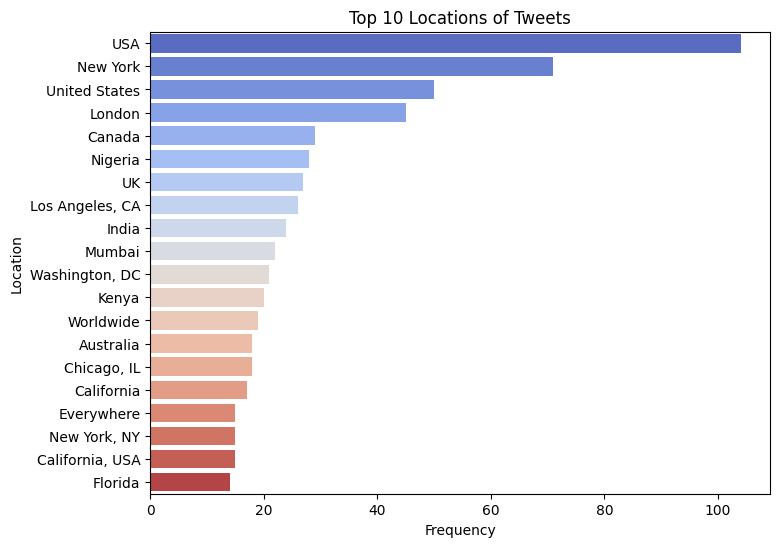

In [ ]:
# Extract top 10 locations
top_locations = train['location'].value_counts().head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations of Tweets')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.show()


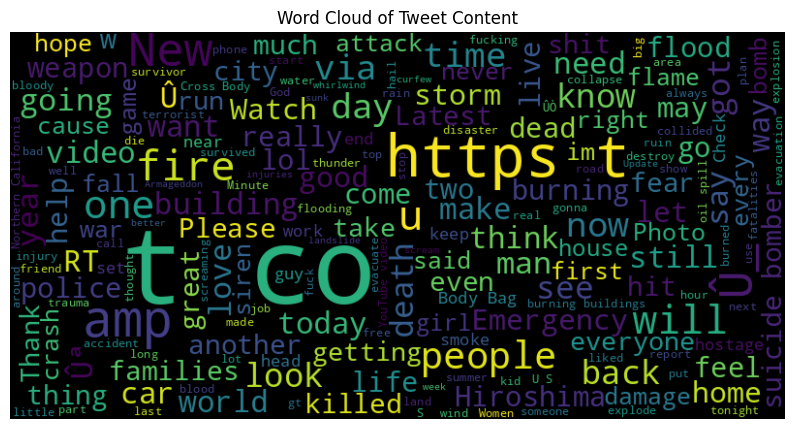

In [ ]:
from wordcloud import WordCloud

# Combine all the tweet texts
all_words = ' '.join([text for text in train['text']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Tweet Content')
plt.show()


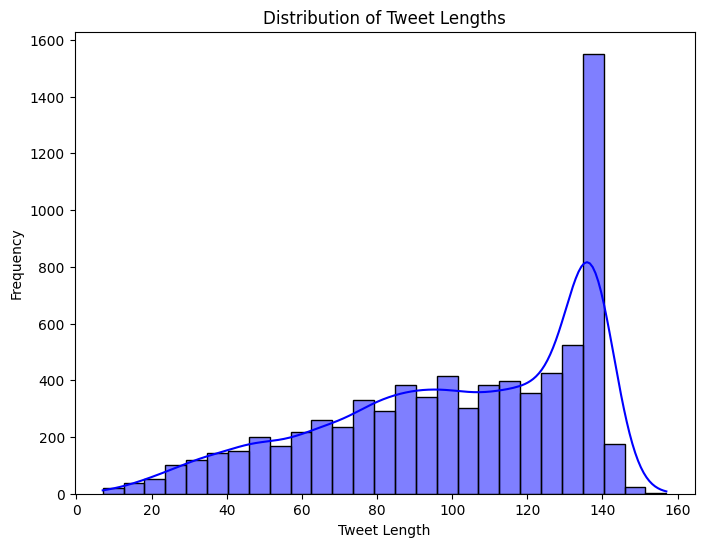

In [ ]:
# Add a new column for tweet length
train['tweet_length'] = train['text'].apply(len)

# Plotting the distribution of tweet lengths
plt.figure(figsize=(8,6))
sns.histplot(train['tweet_length'], kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


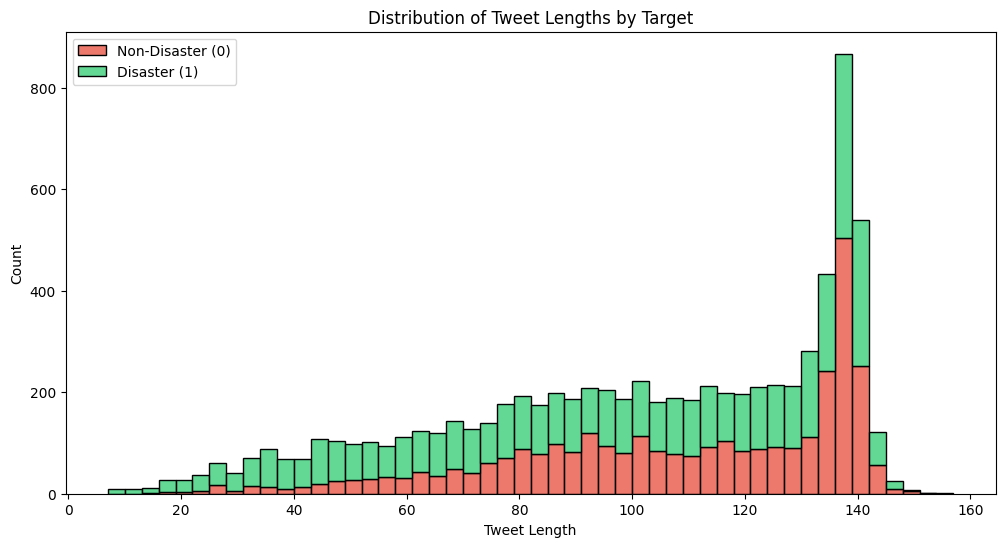

In [ ]:

# Plotting the distribution
plt.figure(figsize=(12,6))
sns.histplot(data=train, x='tweet_length', hue='target', multiple='stack', palette=['#2ecc71','#e74c3c'], bins=50)
plt.title('Distribution of Tweet Lengths by Target')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.legend(labels=['Non-Disaster (0)', 'Disaster (1)'])
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-254-d929400fcb7e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in top20_disaster], y=[word for word, count in top20_disaster], palette='Reds_r')


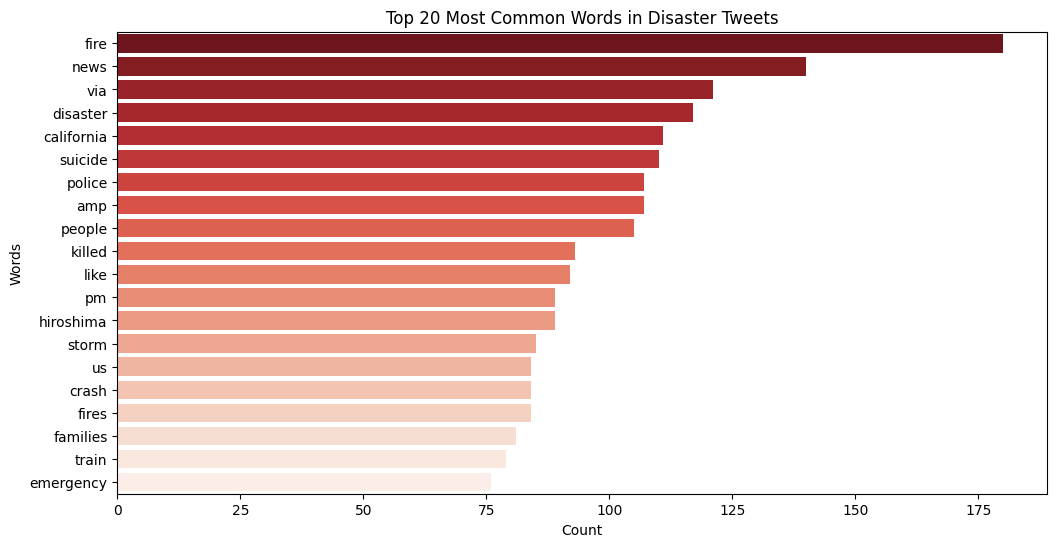

<ipython-input-254-d929400fcb7e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in top20_non_disaster], y=[word for word, count in top20_non_disaster], palette='Blues_r')


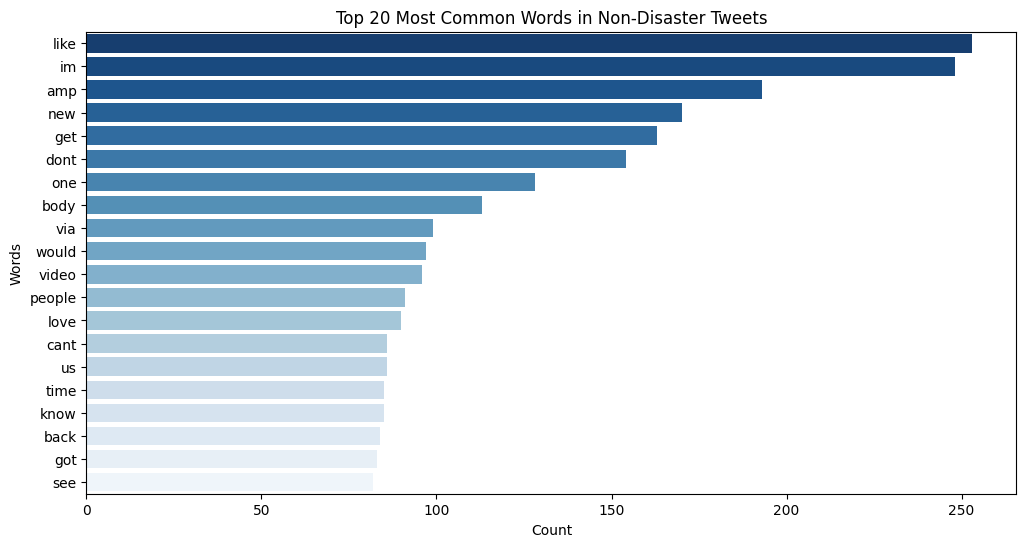

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import re

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = text.split()  # Tokenize
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return text

# Preprocess text for both categories
disaster_tweets = train[train['target'] == 1]['text'].apply(preprocess_text)
non_disaster_tweets = train[train['target'] == 0]['text'].apply(preprocess_text)

# Get top 20 words for disaster tweets
disaster_words = Counter([word for tweet in disaster_tweets for word in tweet])
top20_disaster = disaster_words.most_common(20)

# Get top 20 words for non-disaster tweets
non_disaster_words = Counter([word for tweet in non_disaster_tweets for word in tweet])
top20_non_disaster = non_disaster_words.most_common(20)

# Plot for disaster tweets
plt.figure(figsize=(12,6))
sns.barplot(x=[count for word, count in top20_disaster], y=[word for word, count in top20_disaster], palette='Reds_r')
plt.title('Top 20 Most Common Words in Disaster Tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

# Plot for non-disaster tweets
plt.figure(figsize=(12,6))
sns.barplot(x=[count for word, count in top20_non_disaster], y=[word for word, count in top20_non_disaster], palette='Blues_r')
plt.title('Top 20 Most Common Words in Non-Disaster Tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


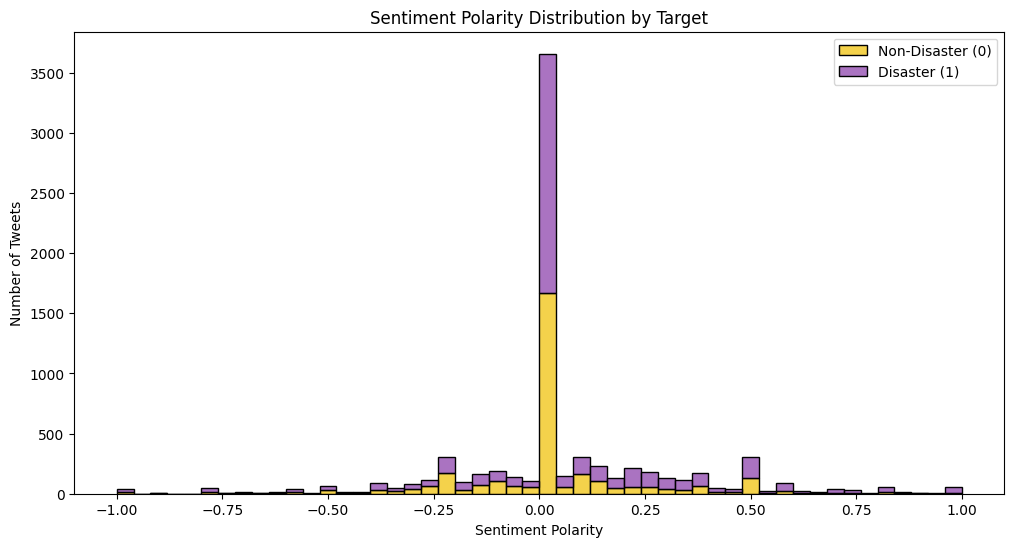

In [ ]:
!pip install textblob
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment polarity
train['sentiment'] = train['text'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(12,6))
sns.histplot(data=train, x='sentiment', hue='target', multiple='stack', palette=['#8e44ad', '#f1c40f'], bins=50)
plt.title('Sentiment Polarity Distribution by Target')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Tweets')
plt.legend(labels=['Non-Disaster (0)', 'Disaster (1)'])
plt.show()


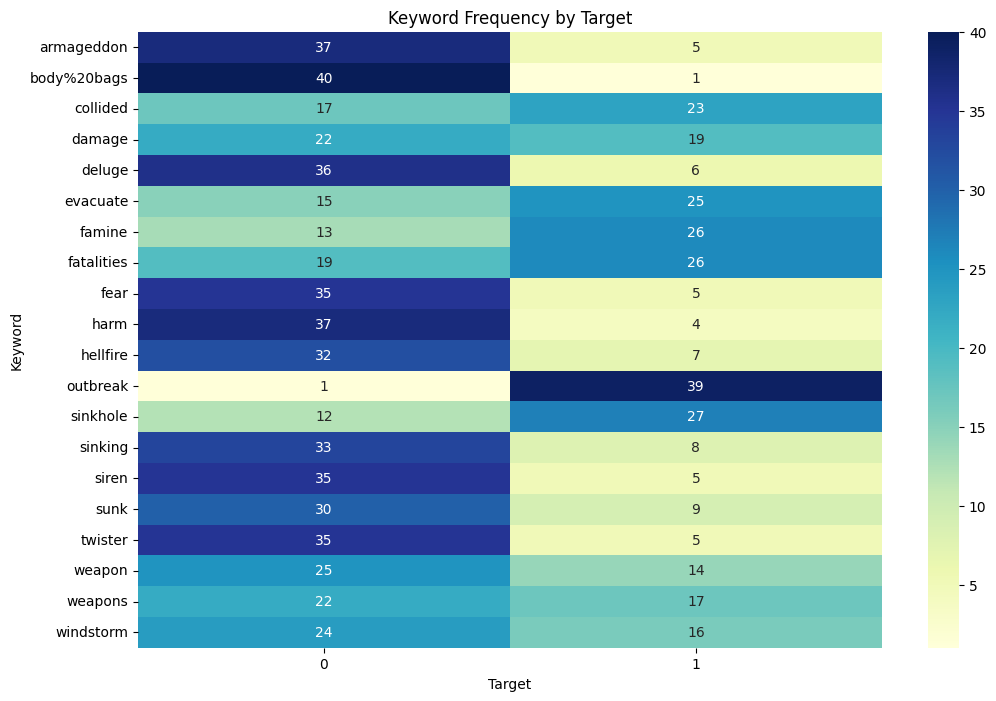

In [ ]:
# Get top 20 keywords overall
top_keywords = train['keyword'].value_counts().head(20).index.tolist()

# Create a pivot table
keyword_pivot = train[train['keyword'].isin(top_keywords)].pivot_table(index='keyword', columns='target', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(keyword_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Keyword Frequency by Target')
plt.xlabel('Target')
plt.ylabel('Keyword')
plt.show()


In [ ]:
missing_data = train[['keyword', 'location']].isnull().sum()
missing_percentage = (missing_data / len(train)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print("Missing Data Before Cleaning:")
print(missing_info)

# Step 2: Handling missing 'keyword' values
train['keyword'].fillna('no_keyword', inplace=True)

# Step 3: Handling missing 'location' values
train['location'].fillna('unknown', inplace=True)

# Step 4: Verifying the cleaning process
missing_data_after = train[['keyword', 'location']].isnull().sum()
print("\nMissing Data After Cleaning:")
print(missing_data_after)


Missing Data Before Cleaning:
          Missing Values  Percentage
keyword               61    0.801261
location            2533   33.272035

Missing Data After Cleaning:
keyword     0
location    0
dtype: int64


In [ ]:
train

,id,keyword,location,text,target,tweet_length,sentiment
0,1,no_keyword,unknown,Our Deeds are the Reason of this #earthquake M...,1,69,0.000000
1,4,no_keyword,unknown,Forest fire near La Ronge Sask. Canada,1,38,0.100000
2,5,no_keyword,unknown,All residents asked to 'shelter in place' are ...,1,133,-0.018750
3,6,no_keyword,unknown,"13,000 people receive #wildfires evacuation or...",1,65,0.000000
4,7,no_keyword,unknown,Just got sent this photo from Ruby #Alaska as ...,1,88,0.000000
...,...,...,...,...,...,...,...
7608,10869,no_keyword,unknown,Two giant cranes holding a bridge collapse int...,1,83,0.000000
7609,10870,no_keyword,unknown,@aria_ahrary @TheTawniest The out of control w...,1,125,0.150000
7610,10871,no_keyword,unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,0.000000
7611,10872,no_keyword,unknown,Police investigating after an e-bike collided ...,1,137,-0.260417


In [ ]:
import string
import re
from bs4 import BeautifulSoup
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate, Flatten
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
import contractions
import spacy

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize necessary tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def text_preprocessing(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Expand contractions
    text = contractions.fix(text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove emojis
    emoji_pattern = re.compile(
        "["x
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Normalize (tokenization, lemmatization, and stemming)
    tokens = nltk.word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    text = ' '.join(stemmed_tokens)

    return text

# Apply text preprocessing to text, location, and keyword columns
train['text'] = train['text'].apply(text_preprocessing)
train['location'] = train['location'].fillna('unknown').apply(text_preprocessing)
train['keyword'] = train['keyword'].fillna('unknown').apply(text_preprocessing)

# Initialize a single Tokenizer for all text-based columns
tokenizer = Tokenizer()

# Fit the tokenizer on all the text-based columns
tokenizer.fit_on_texts(train['text'])
tokenizer.fit_on_texts(train['location'])
tokenizer.fit_on_texts(train['keyword'])

# Convert texts to sequences
sequences_text = tokenizer.texts_to_sequences(train['text'])
sequences_location = tokenizer.texts_to_sequences(train['location'])
sequences_keyword = tokenizer.texts_to_sequences(train['keyword'])

# Pad sequences to ensure uniform length
MAX_SEQUENCE_LENGTH = 100  # Adjust based on your data
X_text = pad_sequences(sequences_text, maxlen=MAX_SEQUENCE_LENGTH)
X_location = pad_sequences(sequences_location, maxlen=MAX_SEQUENCE_LENGTH)
X_keyword = pad_sequences(sequences_keyword, maxlen=MAX_SEQUENCE_LENGTH)

# Get the target variable
y = train['target'].values


<ipython-input-259-4b3d1e14904d>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-259-4b3d1e14904d>:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
X_train_keyword

array([[  0,   0,   0, ...,   0,   0, 144],
       [  0,   0,   0, ...,   0,   0, 203],
       [  0,   0,   0, ...,   0,   0, 205],
       ...,
       [  0,   0,   0, ...,   0,   0, 171],
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0, 181]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_text, X_val_text, X_train_location, X_val_location, X_train_keyword, X_val_keyword, y_train, y_val = train_test_split(
    X_text, X_location, X_keyword, y, test_size=0.3, random_state=42)


In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

def build_model(vocab_size, input_length):
    # Text input and embedding
    text_input = Input(shape=(input_length,), name='text_input')
    text_embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length)(text_input)
    text_lstm = LSTM(128, return_sequences=False, dropout=0.4, recurrent_dropout=0.4)(text_embedding)  # Increased dropout
    text_bn = BatchNormalization()(text_lstm)

    # Location input and embedding
    location_input = Input(shape=(input_length,), name='location_input')
    location_embedding = Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length)(location_input)
    location_lstm = LSTM(64, return_sequences=False, dropout=0.4, recurrent_dropout=0.4)(location_embedding)  # Increased dropout
    location_bn = BatchNormalization()(location_lstm)

    # Keyword input and embedding
    keyword_input = Input(shape=(input_length,), name='keyword_input')
    keyword_embedding = Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length)(keyword_input)
    keyword_lstm = LSTM(64, return_sequences=False, dropout=0.4, recurrent_dropout=0.4)(keyword_embedding)  # Increased dropout
    keyword_bn = BatchNormalization()(keyword_lstm)

    # Concatenate the outputs from the LSTM layers
    concatenated = concatenate([text_bn, location_bn, keyword_bn])

    # Fully connected layers with L2 regularization and Batch Normalization
    dense = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
    dense_bn = BatchNormalization()(dense)
    dense_drop = Dropout(0.5)(dense_bn)
    output = Dense(1, activation='sigmoid')(dense_drop)

    # Build and compile model
    model = Model(inputs=[text_input, location_input, keyword_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Get the vocabulary size from the tokenizer
vocab_size = len(tokenizer.word_index) + 1

# Build the model
model = build_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    {'text_input': X_train_text,
     'location_input': X_train_location,
     'keyword_input': X_train_keyword},
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=({'text_input': X_val_text,
                      'location_input': X_val_location,
                      'keyword_input': X_val_keyword},
                     y_val),
    callbacks=[early_stopping])


val_loss, val_accuracy = model.evaluate(
    {'text_input': X_val_text,
     'location_input': X_val_location,
     'keyword_input': X_val_keyword},
    y_val,
    verbose=0)

print(f'Adjusted Deep Learning Model Accuracy: {val_accuracy * 100:.2f}%')


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ location_input            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ keyword_input             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_115 (Embedding) │ (None, 100, 128)       │      2,594,176 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_116 (Embedding) │ (None, 100, 64)        │      1,297,088 │ location_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_117 (Embedding) │ (None, 100, 64)        │      1,297,088 │ keyword_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_114 (LSTM)           │ (None, 128)            │        131,584 │ embedding_115[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_115 (LSTM)           │ (None, 64)             │         33,024 │ embedding_116[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_116 (LSTM)           │ (None, 64)             │         33,024 │ embedding_117[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 128)            │            512 │ lstm_114[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 64)             │            256 │ lstm_115[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 64)             │            256 │ lstm_116[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_39            │ (None, 256)            │              0 │ batch_normalization_1… │
│ (Concatenate)             │                        │                │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_105 (Dense)         │ (None, 64)             │         16,448 │ concatenate_39[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 64)             │            256 │ dense_105[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_39 (Dropout) 

 Total params: 5,403,777 (20.61 MB)

 Trainable params: 5,403,137 (20.61 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 131s 622ms/step - accuracy: 0.5623 - loss: 1.7659 - val_accuracy: 0.7722 - val_loss: 1.2416
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 89s 467ms/step - accuracy: 0.8063 - loss: 0.9576 - val_accuracy: 0.7879 - val_loss: 0.8762
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 145s 485ms/step - accuracy: 0.8968 - loss: 0.5451 - val_accuracy: 0.7531 - val_loss: 0.6942
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 462ms/step - accuracy: 0.9445 - loss: 0.3170 - val_accuracy: 0.7610 - val_loss: 0.7177
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 85s 446ms/step - accuracy: 0.9582 - loss: 0.1977 - val_accuracy: 0.7118 - val_loss: 0.9326
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 142s 446ms/step - accuracy: 0.9640 - loss: 0.1491 - val_accuracy: 0.7420 - val_loss: 0.8652
Adjusted Deep Learning Model Accuracy: 75.31%


In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D

def build_cnn_model(vocab_size, input_length):
    # Text input and embedding
    text_input = Input(shape=(input_length,), name='text_input')
    text_embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length)(text_input)
    text_conv = Conv1D(filters=128, kernel_size=3, activation='relu')(text_embedding)
    text_pool = GlobalMaxPooling1D()(text_conv)
    text_bn = BatchNormalization()(text_pool)

    # Location input and embedding
    location_input = Input(shape=(input_length,), name='location_input')
    location_embedding = Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length)(location_input)
    location_conv = Conv1D(filters=64, kernel_size=3, activation='relu')(location_embedding)
    location_pool = GlobalMaxPooling1D()(location_conv)
    location_bn = BatchNormalization()(location_pool)

    # Keyword input and embedding
    keyword_input = Input(shape=(input_length,), name='keyword_input')
    keyword_embedding = Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length)(keyword_input)
    keyword_conv = Conv1D(filters=64, kernel_size=3, activation='relu')(keyword_embedding)
    keyword_pool = GlobalMaxPooling1D()(keyword_conv)
    keyword_bn = BatchNormalization()(keyword_pool)

    # Concatenate the outputs from the CNN layers
    concatenated = concatenate([text_bn, location_bn, keyword_bn])

    # Fully connected layers with L2 regularization and Batch Normalization
    dense = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
    dense_bn = BatchNormalization()(dense)
    dense_drop = Dropout(0.5)(dense_bn)
    output = Dense(1, activation='sigmoid')(dense_drop)

    # Build and compile model
    model = Model(inputs=[text_input, location_input, keyword_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Build the CNN model
model = build_cnn_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
model.summary()

# Build the CNN model
model = build_cnn_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
model.summary()

history = model.fit(
    {'text_input': X_train_text,
     'location_input': X_train_location,
     'keyword_input': X_train_keyword},
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=({'text_input': X_val_text,
                      'location_input': X_val_location,
                      'keyword_input': X_val_keyword},
                     y_val))

val_loss, val_accuracy = model.evaluate(
    {'text_input': X_val_text,
     'location_input': X_val_location,
     'keyword_input': X_val_keyword},
    y_val,
    verbose=0)

print(f'CNN Model Accuracy: {val_accuracy * 100:.2f}%')


Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ location_input            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ keyword_input             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_139 (Embedding) │ (None, 100, 128)       │      2,594,176 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_140 (Embedding) │ (None, 100, 64)        │      1,297,088 │ location_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_141 (Embedding) │ (None, 100, 64)        │      1,297,088 │ keyword_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 98, 128)        │         49,280 │ embedding_139[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 98, 64)         │         12,352 │ embedding_140[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_17 (Conv1D)        │ (None, 98, 64)         │         12,352 │ embedding_141[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_15   │ (None, 128)            │              0 │ conv1d_15[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_16   │ (None, 64)             │              0 │ conv1d_16[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_17   │ (None, 64)             │              0 │ conv1d_17[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_44    │ (None, 128)            │            512 │ global_max_pooling1d_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_45    │ (None, 64)             │            256 │ global_max_pooling1d_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_46    │ (None, 64)             │            256 │ global_max_pooling1d_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_47       

 Total params: 5,280,129 (20.14 MB)

 Trainable params: 5,279,489 (20.14 MB)

 Non-trainable params: 640 (2.50 KB)

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ location_input            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ keyword_input             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_142 (Embedding) │ (None, 100, 128)       │      2,594,176 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_143 (Embedding) │ (None, 100, 64)        │      1,297,088 │ location_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_144 (Embedding) │ (None, 100, 64)        │      1,297,088 │ keyword_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_18 (Conv1D)        │ (None, 98, 128)        │         49,280 │ embedding_142[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_19 (Conv1D)        │ (None, 98, 64)         │         12,352 │ embedding_143[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_20 (Conv1D)        │ (None, 98, 64)         │         12,352 │ embedding_144[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_18   │ (None, 128)            │              0 │ conv1d_18[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_19   │ (None, 64)             │              0 │ conv1d_19[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_20   │ (None, 64)             │              0 │ conv1d_20[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_48    │ (None, 128)            │            512 │ global_max_pooling1d_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_49    │ (None, 64)             │            256 │ global_max_pooling1d_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_50    │ (None, 64)             │            256 │ global_max_pooling1d_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_48       

 Total params: 5,280,129 (20.14 MB)

 Trainable params: 5,279,489 (20.14 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 29s 128ms/step - accuracy: 0.6354 - loss: 1.5658 - val_accuracy: 0.6251 - val_loss: 1.1220
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.8674 - loss: 0.7221 - val_accuracy: 0.6500 - val_loss: 0.8684
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9559 - loss: 0.3808 - val_accuracy: 0.7859 - val_loss: 0.6669
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.9760 - loss: 0.2259 - val_accuracy: 0.7479 - val_loss: 0.7259
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9849 - loss: 0.1420 - val_accuracy: 0.7787 - val_loss: 0.7301
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9814 - loss: 0.1158 - val_accuracy: 0.7643 - val_loss: 0.7959
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9814 - loss: 0.1006 - val_accuracy: 0.7571 - val_loss: 0.9312
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.9769 - loss: 0

In [ ]:
from keras.layers import GRU

def build_gru_model(vocab_size, input_length):
    # Text input and embedding
    text_input = Input(shape=(input_length,), name='text_input')
    text_embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length)(text_input)
    text_gru = GRU(128, return_sequences=False, dropout=0.4, recurrent_dropout=0.4)(text_embedding)
    text_bn = BatchNormalization()(text_gru)

    # Location input and embedding
    location_input = Input(shape=(input_length,), name='location_input')
    location_embedding = Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length)(location_input)
    location_gru = GRU(64, return_sequences=False, dropout=0.4, recurrent_dropout=0.4)(location_embedding)
    location_bn = BatchNormalization()(location_gru)

    # Keyword input and embedding
    keyword_input = Input(shape=(input_length,), name='keyword_input')
    keyword_embedding = Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length)(keyword_input)
    keyword_gru = GRU(64, return_sequences=False, dropout=0.4, recurrent_dropout=0.4)(keyword_embedding)
    keyword_bn = BatchNormalization()(keyword_gru)

    # Concatenate the outputs from the GRU layers
    concatenated = concatenate([text_bn, location_bn, keyword_bn])

    # Fully connected layers with L2 regularization and Batch Normalization
    dense = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
    dense_bn = BatchNormalization()(dense)
    dense_drop = Dropout(0.5)(dense_bn)
    output = Dense(1, activation='sigmoid')(dense_drop)

    # Build and compile model
    model = Model(inputs=[text_input, location_input, keyword_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Build the GRU model
model = build_gru_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
model.summary()

history = model.fit(
    {'text_input': X_train_text,
     'location_input': X_train_location,
     'keyword_input': X_train_keyword},
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=({'text_input': X_val_text,
                      'location_input': X_val_location,
                      'keyword_input': X_val_keyword},
                     y_val))

val_loss, val_accuracy = model.evaluate(
    {'text_input': X_val_text,
     'location_input': X_val_location,
     'keyword_input': X_val_keyword},
    y_val,
    verbose=0)

print(f'GRU Model Accuracy: {val_accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ location_input            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ keyword_input             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_136 (Embedding) │ (None, 100, 128)       │      2,594,176 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_137 (Embedding) │ (None, 100, 64)        │      1,297,088 │ location_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_138 (Embedding) │ (None, 100, 64)        │      1,297,088 │ keyword_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_3 (GRU)               │ (None, 128)            │         99,072 │ embedding_136[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_4 (GRU)               │ (None, 64)             │         24,960 │ embedding_137[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_5 (GRU)               │ (None, 64)             │         24,960 │ embedding_138[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_40    │ (None, 128)            │            512 │ gru_3[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_41    │ (None, 64)             │            256 │ gru_4[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_42    │ (None, 64)             │            256 │ gru_5[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_46            │ (None, 256)            │              0 │ batch_normalization_4… │
│ (Concatenate)             │                        │                │ batch_normalization_4… │
│                           │                        │                │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_119 (Dense)         │ (None, 64)             │         16,448 │ concatenate_46[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_43    │ (None, 64)             │            256 │ dense_119[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_46 (Dropout) 

 Total params: 5,355,137 (20.43 MB)

 Trainable params: 5,354,497 (20.43 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 109s 503ms/step - accuracy: 0.4948 - loss: 1.8065 - val_accuracy: 0.5739 - val_loss: 1.2724
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 132s 449ms/step - accuracy: 0.5282 - loss: 1.3107 - val_accuracy: 0.5739 - val_loss: 1.0651
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 142s 453ms/step - accuracy: 0.5831 - loss: 1.0391 - val_accuracy: 0.5739 - val_loss: 0.9321
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 462ms/step - accuracy: 0.6769 - loss: 0.8312 - val_accuracy: 0.5739 - val_loss: 0.8475
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 138s 443ms/step - accuracy: 0.7115 - loss: 0.7224 - val_accuracy: 0.5739 - val_loss: 0.7955
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 91s 478ms/step - accuracy: 0.7053 - loss: 0.6767 - val_accuracy: 0.5739 - val_loss: 0.7585
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 139s 461ms/step - accuracy: 0.7295 - loss: 0.6260 - val_accuracy: 0.5739 - val_loss: 0.7366
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 137s 439ms/step - accuracy: 0.7197 - l

In [ ]:
# Convert train data to sequences
sequences_text_train = tokenizer.texts_to_sequences(train['text'])
sequences_location_train = tokenizer.texts_to_sequences(train['location'])
sequences_keyword_train = tokenizer.texts_to_sequences(train['keyword'])

# Pad sequences for train data
X_train_text = pad_sequences(sequences_text_train, maxlen=MAX_SEQUENCE_LENGTH)
X_train_location = pad_sequences(sequences_location_train, maxlen=MAX_SEQUENCE_LENGTH)
X_train_keyword = pad_sequences(sequences_keyword_train, maxlen=MAX_SEQUENCE_LENGTH)

# Train labels
y_train = train['target'].values  # Assuming binary labels are in the 'target' column

# Train the CNN model on the entire training data
model = build_cnn_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
history = model.fit(
    {'text_input': X_train_text,
     'location_input': X_train_location,
     'keyword_input': X_train_keyword},
    y_train,
    epochs=10,
    batch_size=32,
    verbose=1)


Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 30s 99ms/step - accuracy: 0.6195 - loss: 1.6488
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.8526 - loss: 0.7496
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.9547 - loss: 0.3733
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9692 - loss: 0.2181
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.9785 - loss: 0.1339
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.9804 - loss: 0.1071
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9813 - loss: 0.0903
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9739 - loss: 0.1069
Epoch 9/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9742 - loss: 0.1008
Epoch 10/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9766 - loss: 0.0917


In [ ]:
# Preprocess the test data using the same steps as the training data
test['text'] = test['text'].apply(text_preprocessing)
test['location'] = test['location'].fillna('unknown').apply(text_preprocessing)
test['keyword'] = test['keyword'].fillna('unknown').apply(text_preprocessing)

# Convert test data to sequences
sequences_text_test = tokenizer.texts_to_sequences(test['text'])
sequences_location_test = tokenizer.texts_to_sequences(test['location'])
sequences_keyword_test = tokenizer.texts_to_sequences(test['keyword'])

# Pad sequences for test data
X_test_text = pad_sequences(sequences_text_test, maxlen=MAX_SEQUENCE_LENGTH)
X_test_location = pad_sequences(sequences_location_test, maxlen=MAX_SEQUENCE_LENGTH)
X_test_keyword = pad_sequences(sequences_keyword_test, maxlen=MAX_SEQUENCE_LENGTH)

# Use the model to predict on test data
predictions = model.predict({'text_input': X_test_text, 'location_input': X_test_location, 'keyword_input': X_test_keyword})

# Convert predictions to binary outcome
predictions_binary = (predictions > 0.5).astype(int).flatten()

results_df = pd.DataFrame({
    'id': test['id'],
    'target': predictions_binary  })

# Display the resulting DataFrame
results_df.head()


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
results_df.to_csv('disaster_predictions1.csv', index=False)


In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D

def build_cnn_model(vocab_size, input_length):
    # Text input and embedding
    text_input = Input(shape=(input_length,), name='text_input')
    text_embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length)(text_input)
    text_conv = Conv1D(filters=128, kernel_size=3, activation='relu')(text_embedding)
    text_pool = GlobalMaxPooling1D()(text_conv)
    text_bn = BatchNormalization()(text_pool)

    # Concatenate the outputs from the CNN layers
    concatenated = concatenate([text_bn])

    # Fully connected layers with L2 regularization and Batch Normalization
    dense = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
    dense_bn = BatchNormalization()(dense)
    dense_drop = Dropout(0.5)(dense_bn)
    output = Dense(1, activation='sigmoid')(dense_drop)

    # Build and compile model
    model = Model(inputs=[text_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Build the CNN model
model = build_cnn_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
model.summary()

# Build the CNN model
model = build_cnn_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
model.summary()

history = model.fit(
    {'text_input': X_train_text, },
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=({'text_input': X_val_text, },
                     y_val))

val_loss, val_accuracy = model.evaluate(
    {'text_input': X_val_text, },
    y_val,
    verbose=0)

print(f'CNN Model Accuracy: {val_accuracy * 100:.2f}%')


Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_163 (Embedding)            │ (None, 100, 128)            │       2,594,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 98, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_39              │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_78               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ concatenate_57 (Concatenate)         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_79               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,652,545 (10.12 MB)

 Trainable params: 2,652,161 (10.12 MB)

 Non-trainable params: 384 (1.50 KB)

Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_164 (Embedding)            │ (None, 100, 128)            │       2,594,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_40 (Conv1D)                   │ (None, 98, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_40              │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_80               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ concatenate_58 (Concatenate)         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_81               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,652,545 (10.12 MB)

 Trainable params: 2,652,161 (10.12 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.6235 - loss: 1.5210 - val_accuracy: 0.6449 - val_loss: 1.0098
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9044 - loss: 0.6538 - val_accuracy: 0.9457 - val_loss: 0.4781
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9557 - loss: 0.3474 - val_accuracy: 0.9785 - val_loss: 0.2061
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 34s 126ms/step - accuracy: 0.9693 - loss: 0.2089 - val_accuracy: 0.9816 - val_loss: 0.1265
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9746 - loss: 0.1406 - val_accuracy: 0.9899 - val_loss: 0.0815
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9812 - loss: 0.0972 - val_accuracy: 0.9895 - val_loss: 0.0675
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9798 - loss: 0.0930 - val_accuracy: 0.9882 - val_loss: 0.0640
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9758 - loss: 0.0980 -

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

def build_model(vocab_size, input_length):
    # Text input and embedding
    text_input = Input(shape=(input_length,), name='text_input')
    text_embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length)(text_input)
    text_lstm = LSTM(128, return_sequences=False, dropout=0.4, recurrent_dropout=0.4)(text_embedding)  # Increased dropout
    text_bn = BatchNormalization()(text_lstm)

    # Concatenate the outputs from the LSTM layers
    concatenated = concatenate([text_bn])

    # Fully connected layers with L2 regularization and Batch Normalization
    dense = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
    dense_bn = BatchNormalization()(dense)
    dense_drop = Dropout(0.5)(dense_bn)
    output = Dense(1, activation='sigmoid')(dense_drop)

    # Build and compile model
    model = Model(inputs=[text_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Get the vocabulary size from the tokenizer
vocab_size = len(tokenizer.word_index) + 1

# Build the model
model = build_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    {'text_input': X_train_text},
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=({'text_input': X_val_text},
                     y_val),
    callbacks=[early_stopping])


val_loss, val_accuracy = model.evaluate(
    {'text_input': X_val_text},
    y_val,
    verbose=0)

print(f'Adjusted Deep Learning Model Accuracy: {val_accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_166 (Embedding)            │ (None, 100, 128)            │       2,594,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_120 (LSTM)                      │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ concatenate_60 (Concatenate)         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,734,849 (10.43 MB)

 Trainable params: 2,734,465 (10.43 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 74s 294ms/step - accuracy: 0.5814 - loss: 1.5288 - val_accuracy: 0.5788 - val_loss: 1.0375
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 80s 287ms/step - accuracy: 0.8305 - loss: 0.7554 - val_accuracy: 0.9186 - val_loss: 0.5409
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 78s 272ms/step - accuracy: 0.9080 - loss: 0.4111 - val_accuracy: 0.9689 - val_loss: 0.2321
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 84s 284ms/step - accuracy: 0.9431 - loss: 0.2421 - val_accuracy: 0.9825 - val_loss: 0.1282
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 68s 287ms/step - accuracy: 0.9544 - loss: 0.1723 - val_accuracy: 0.9869 - val_loss: 0.0782
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 81s 284ms/step - accuracy: 0.9660 - loss: 0.1232 - val_accuracy: 0.9825 - val_loss: 0.0689
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 69s 290ms/step - accuracy: 0.9688 - loss: 0.1067 - val_accuracy: 0.9886 - val_loss: 0.0511
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 77s 268ms/step - accuracy: 0.9669 - loss: 0

In [ ]:
# Convert train data to sequences
sequences_text_train = tokenizer.texts_to_sequences(train['text'])

# Pad sequences for train data
X_train_text = pad_sequences(sequences_text_train, maxlen=MAX_SEQUENCE_LENGTH)

# Train labels
y_train = train['target'].values  # Assuming binary labels are in the 'target' column

# Train the CNN model on the entire training data
model = build_cnn_model(vocab_size, input_length=MAX_SEQUENCE_LENGTH)
history = model.fit(
    {'text_input': X_train_text, },
    y_train,
    epochs=20,
    batch_size=32,
    verbose=1)

# Preprocess the test data using the same steps as the training data
test['text'] = test['text'].apply(text_preprocessing)

# Convert test data to sequences
sequences_text_test = tokenizer.texts_to_sequences(test['text'])

# Pad sequences for test data
X_test_text = pad_sequences(sequences_text_test, maxlen=MAX_SEQUENCE_LENGTH)

# Use the model to predict on test data
predictions = model.predict({'text_input': X_test_text})

# Convert predictions to binary outcome
predictions_binary = (predictions > 0.5).astype(int).flatten()

results_df = pd.DataFrame({
    'id': test['id'],
    'target': predictions_binary  })

# Display the resulting DataFrame
results_df.head()


Epoch 1/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.6206 - loss: 1.5329
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.8960 - loss: 0.6506
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9583 - loss: 0.3426
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9740 - loss: 0.1937
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9743 - loss: 0.1306
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.9825 - loss: 0.0980
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9769 - loss: 0.0959
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9707 - loss: 0.1020
Epoch 9/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9746 - loss: 0.0981
Epoch 10/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.9792 - loss: 0.0828
Epoch 11/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9706 - loss: 0.0892
Epoch 12/20
238/238 ━━━━━━━━━━

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
